**Context of dataset**

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight Wi-Fi service: Satisfaction level of the inflight Wi-Fi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [3]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, learning_curve,StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score


In [4]:
from sklearn.decomposition import PCA,KernelPCA


In [5]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("notebook")

In [6]:
df = pd.read_csv("train.csv")
df.drop(columns =['Unnamed: 0', 'id'], inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,103904,2,Female,52727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,103904,2,Loyal Customer,84923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,NaN,NaN,NaN,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,NaN,NaN,NaN,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,NaN,NaN,NaN,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


In [10]:
for col in df:
    print(str.format("{} has {} unique values.", col, len(df[col].unique())))

Gender has 2 unique values.
Customer Type has 2 unique values.
Age has 75 unique values.
Type of Travel has 2 unique values.
Class has 3 unique values.
Flight Distance has 3802 unique values.
Inflight wifi service has 6 unique values.
Departure/Arrival time convenient has 6 unique values.
Ease of Online booking has 6 unique values.
Gate location has 6 unique values.
Food and drink has 6 unique values.
Online boarding has 6 unique values.
Seat comfort has 6 unique values.
Inflight entertainment has 6 unique values.
On-board service has 6 unique values.
Leg room service has 6 unique values.
Baggage handling has 5 unique values.
Checkin service has 6 unique values.
Inflight service has 6 unique values.
Cleanliness has 6 unique values.
Departure Delay in Minutes has 446 unique values.
Arrival Delay in Minutes has 456 unique values.
satisfaction has 2 unique values.


In [11]:
df['Gate location'].unique()

array([1, 3, 2, 5, 4, 0], dtype=int64)

In [12]:
 df['Departure/Arrival time convenient'].unique()

array([4, 2, 5, 3, 1, 0], dtype=int64)

In [13]:
 df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [14]:
 df['satisfaction'].value_counts(normalize = True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

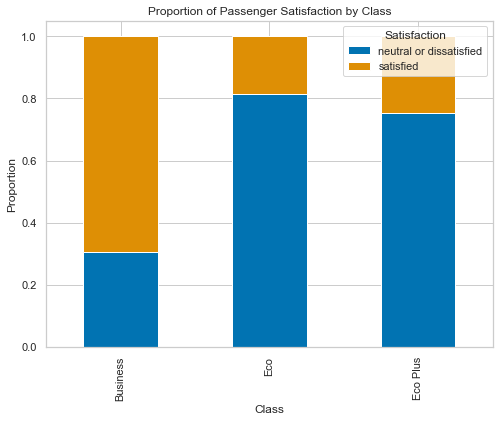

In [15]:
sns.set_context('notebook')
# Calculate the proportion of satisfied passengers within each class
satisfaction_counts = df.groupby(['Class', 'satisfaction']).size().unstack()
satisfaction_counts = satisfaction_counts.div(satisfaction_counts.sum(axis=1), axis=0)

# Use Seaborn's colorblind palette
colors = sns.color_palette('colorblind', n_colors=2)

# Plot proportional stacked bar chart
satisfaction_counts.plot(
    kind='bar', stacked=True, figsize=(8, 6), color=colors
)

# Customize the plot
plt.title('Proportion of Passenger Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.legend(title='Satisfaction')
plt.show()


In [16]:
Categorical_Cols = df.select_dtypes('object').columns
Categorical_Cols

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [17]:
numerical_Cols = df.select_dtypes(exclude='object').columns
numerical_Cols

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [18]:
df.shape

(103904, 23)

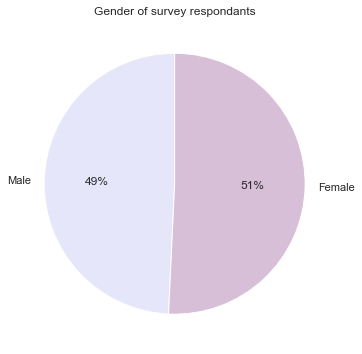

In [19]:
num_male = df[df['Gender'] == 'Male'].shape[0]
num_female = df[df['Gender'] == 'Female'].shape[0]

plt.pie(
    [num_male,num_female],
    labels = ['Male', 'Female'],
    startangle=90,
    autopct='%1.f%%',
     colors=['lavender', 'thistle'])
plt.title('Gender of survey respondants')
plt.show()

### Gender Distribution of Survey Respondents

This indicates that the survey sample is almost evenly split between male and female participants, with a slight majority of females. The balance between the two genders suggests that the survey results are likely to reflect the perspectives of both males and females without significant bias towards either group.

The balanced gender representation is crucial for ensuring that any insights derived from the survey are inclusive and reliable. This is particularly important when analyzing topics like customer satisfaction, preferences, or behaviors, where gender may play a role in shaping responses.

In [20]:
# The correlation matrix
corr_mat = df[numerical_Cols].corr()

# Strip out the diagonal values for the next step
for x in range(len(numerical_Cols)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,0.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,0.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,0.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,0.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,0.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,0.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,0.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,0.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,0.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,0.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


In [21]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

Age                                             Online boarding
Flight Distance                                 Online boarding
Inflight wifi service                    Ease of Online booking
Departure/Arrival time convenient                 Gate location
Ease of Online booking                    Inflight wifi service
Gate location                            Ease of Online booking
Food and drink                                      Cleanliness
Online boarding                           Inflight wifi service
Seat comfort                                        Cleanliness
Inflight entertainment                              Cleanliness
On-board service                               Inflight service
Leg room service                               Baggage handling
Baggage handling                               Inflight service
Checkin service                                On-board service
Inflight service                               Baggage handling
Cleanliness                             

In [22]:
corr_mat.abs().max().sort_values(ascending=False)

Arrival Delay in Minutes             0.965481
Departure Delay in Minutes           0.965481
Inflight wifi service                0.715856
Ease of Online booking               0.715856
Cleanliness                          0.691815
Inflight entertainment               0.691815
Seat comfort                         0.678534
Food and drink                       0.657760
Baggage handling                     0.628561
Inflight service                     0.628561
On-board service                     0.550782
Gate location                        0.458655
Online boarding                      0.456970
Departure/Arrival time convenient    0.444757
Leg room service                     0.369544
Checkin service                      0.243914
Flight Distance                      0.214869
Age                                  0.208939
dtype: float64

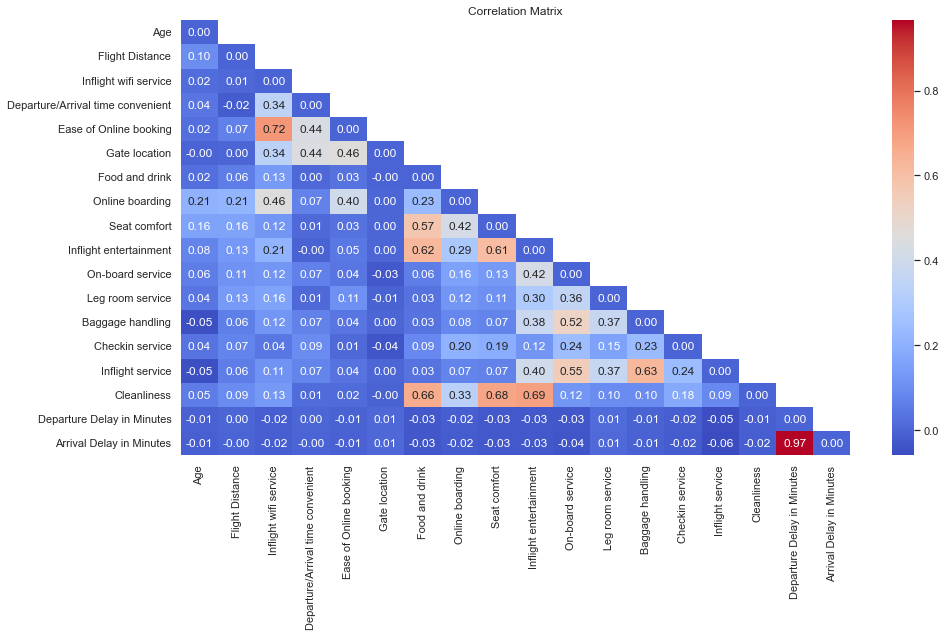

In [23]:
sns.set_context('notebook')
mask = np.triu(corr_mat)
plt.figure(figsize=(15,8))
sns.heatmap(corr_mat,annot = True, mask = mask, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observations from Heatmap

**Strong Correlations:**

- **Ease of Online Booking** and **Departure/Arrival Time Convenient** have a strong positive correlation (0.72). We might consider reducing these multicollinear features as they could be redundant.
- **Departure Delay in Minutes** and **Arrival Delay in Minutes** are highly correlated (0.97). It might be a good idea to keep only one of these features to avoid redundancy.

**Feature Groupings:**

- Features related to **onboard experience** (e.g., **Seat Comfort**, **Online Boarding**, **Inflight Entertainment**) show some moderate correlations among themselves.
- **Ease of Online Booking** is correlated with features like **Online Boarding** (0.46). This might suggest a relationship between the ease of booking and the overall boarding experience.


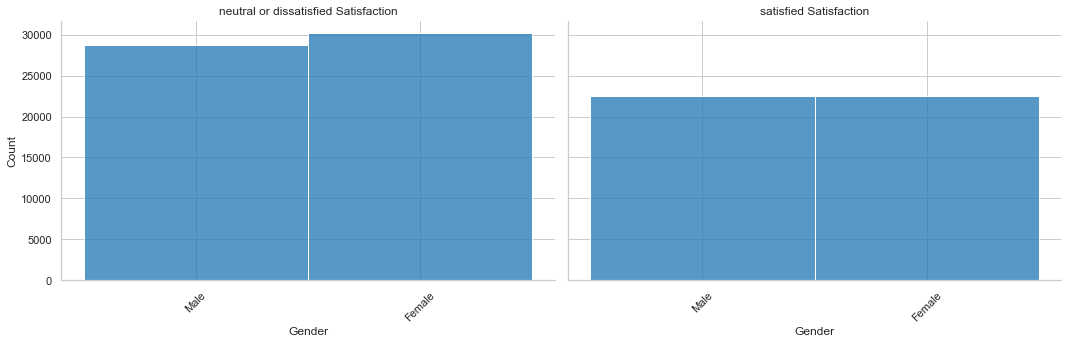

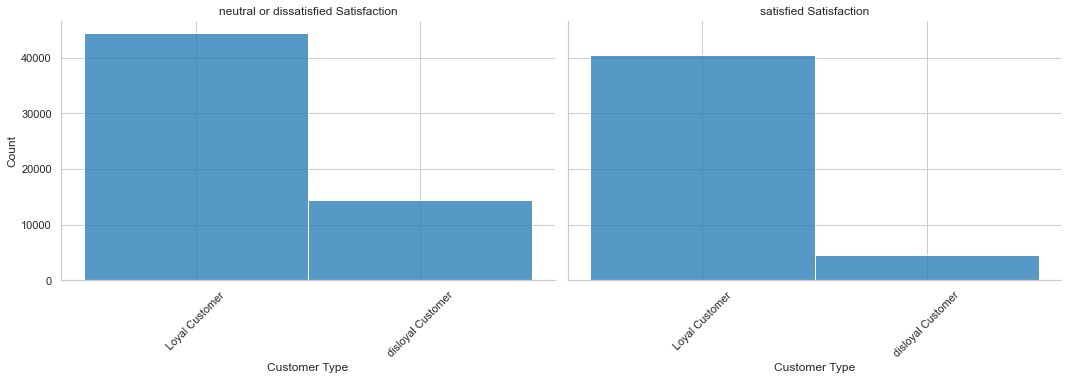

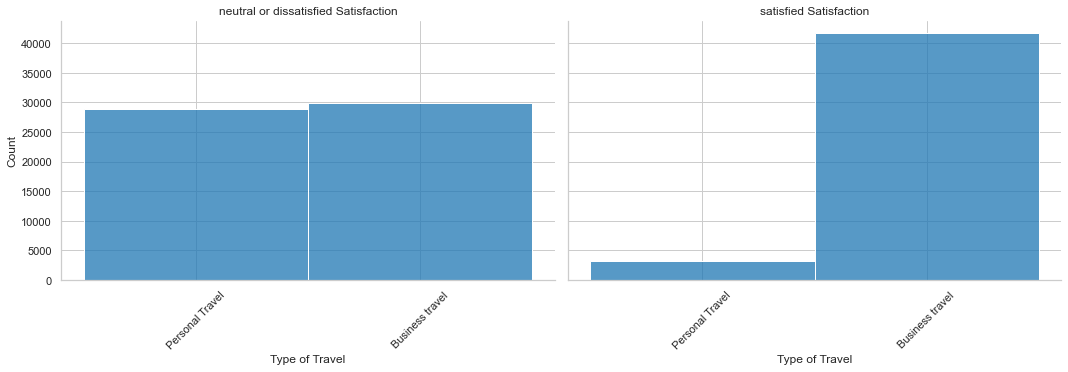

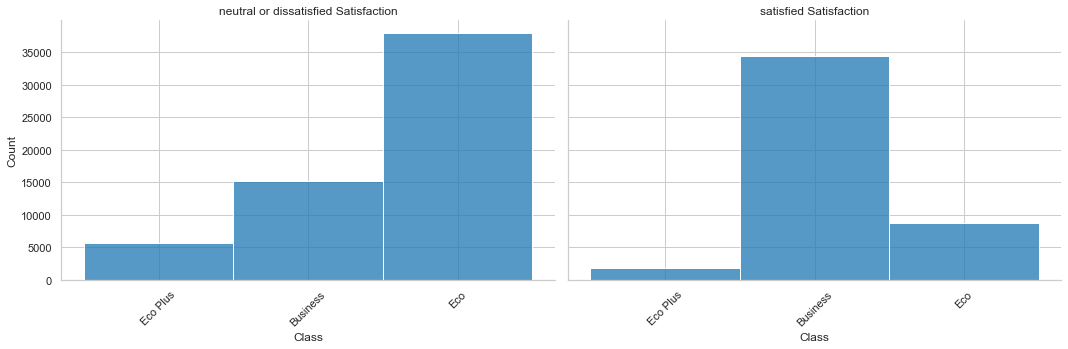

<Figure size 432x432 with 0 Axes>

In [24]:
sns.set_context('notebook')
for col in Categorical_Cols:
    if col != 'satisfaction':
    # Create FacetGrid
       g = sns.FacetGrid(df, col='satisfaction', height=5, aspect=1.5)
    
    # Plot histogram for each categorical variable
       g.map(sns.histplot, col)
    
    # Set the rotation for x-axis labels for better readability
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
    
    # Remove the default title to avoid overlap
    g.set_titles("{col_name} Satisfaction")
    
    plt.subplots_adjust(top=0.85)  # Adjust the space at the top of the plot
    plt.show()



## Preprocessing 

In [25]:
df_reduced = df.copy()
df_reduced.drop(columns=['Arrival Delay in Minutes','Gender','Inflight wifi service'], inplace = True)
df_reduced.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Business,235,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Loyal Customer,25,Business travel,Business,562,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


In [26]:
#Split the data into Train and Test sets
X_train, X_test = train_test_split(df_reduced, test_size=0.3, random_state=42)

In [27]:
X_train.shape

(72732, 20)

In [29]:
X_train_numerical = X_train.select_dtypes(exclude='object').columns
X_train_numerical

Index(['Age', 'Flight Distance', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes'],
      dtype='object')

In [31]:
skew_columns = (X_train[X_train_numerical]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Departure Delay in Minutes    7.131086
Flight Distance               1.106549
dtype: float64

In [32]:
skewd_df = X_train[['Departure Delay in Minutes', 'Flight Distance']]
skewd_df.head()

,Departure Delay in Minutes,Flight Distance
17901,0,1235
49209,89,603
32340,0,2586
50831,0,2422
10989,18,1076


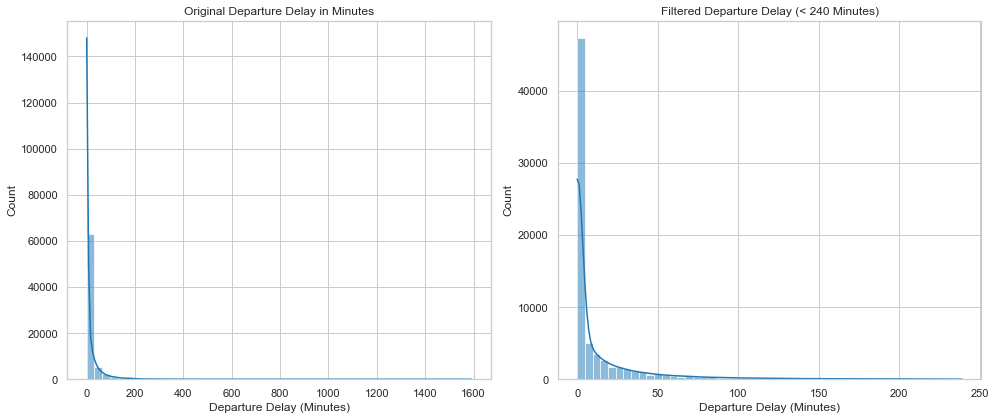

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original histogram
plt.figure(figsize=(14, 6))

# Original histogram
plt.subplot(1, 2, 1)
sns.histplot(skewd_df['Departure Delay in Minutes'], bins=50, kde=True)
plt.title('Original Departure Delay in Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Count')

# Removing extreme outliers (e.g., keeping delays less than 240 minutes)
skewd_df = skewd_df[skewd_df['Departure Delay in Minutes'] < 240]

# Plot histogram after removing outliers
plt.subplot(1, 2, 2)
sns.histplot(skewd_df['Departure Delay in Minutes'], bins=50, kde=True)
plt.title('Filtered Departure Delay (< 240 Minutes)')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


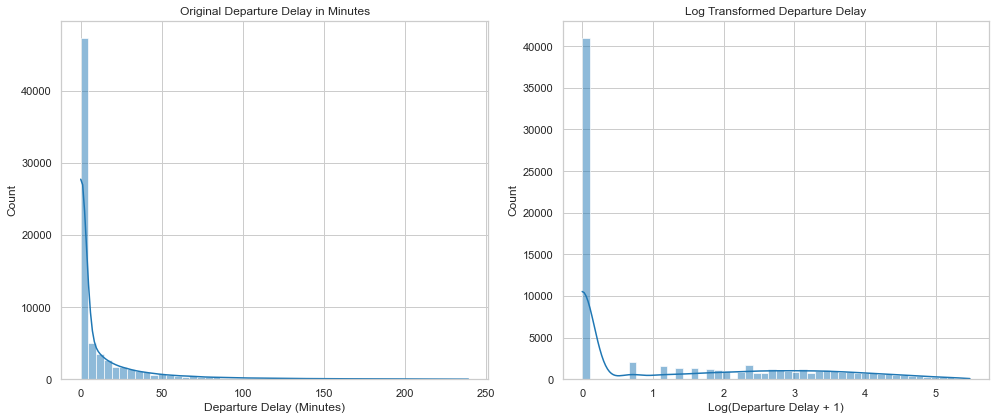

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Original and log-transformed data
skewd_df['log_Departure Delay'] = np.log1p(skewd_df['Departure Delay in Minutes'])

# Plot side by side for comparison
plt.figure(figsize=(14, 6))

# Original Histogram
plt.subplot(1, 2, 1)
sns.histplot(skewd_df['Departure Delay in Minutes'], bins=50, kde=True)
plt.title('Original Departure Delay in Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Count')

# Log-transformed Histogram
plt.subplot(1, 2, 2)
sns.histplot(skewd_df['log_Departure Delay'], bins=50, kde=True)
plt.title('Log Transformed Departure Delay')
plt.xlabel('Log(Departure Delay + 1)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [35]:
skewd_df.head()

,Departure Delay in Minutes,Flight Distance,log_Departure Delay
17901,0,1235,0.000000
49209,89,603,4.499810
32340,0,2586,0.000000
50831,0,2422,0.000000
10989,18,1076,2.944439


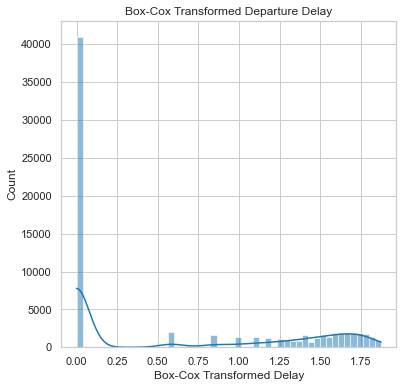

In [36]:
from scipy import stats

# Apply Box-Cox transformation (ensure there are no 0 values)
skewd_df['Departure Delay in Minutes'] = skewd_df['Departure Delay in Minutes'] + 1  # Adding 1 to handle 0s
skewd_df['BoxCox_Transformed_Delay'], _ = stats.boxcox(skewd_df['Departure Delay in Minutes'])

# Plot Box-Cox transformed data
sns.histplot(skewd_df['BoxCox_Transformed_Delay'], bins=50, kde=True)
plt.title('Box-Cox Transformed Departure Delay')
plt.xlabel('Box-Cox Transformed Delay')
plt.ylabel('Count')
plt.show()


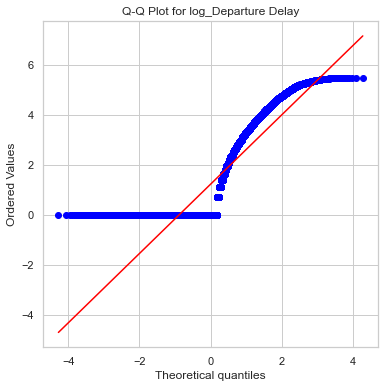

In [37]:
# Rename the column to avoid issues with spaces
skewd_df.rename(columns={'log_Departure Delay': 'log_Departure_Delay'}, inplace=True)

# Then you can use the renamed column in your Q-Q plot
stats.probplot(skewd_df['log_Departure_Delay'], dist="norm", plot=plt)
plt.title('Q-Q Plot for log_Departure Delay')
plt.show()


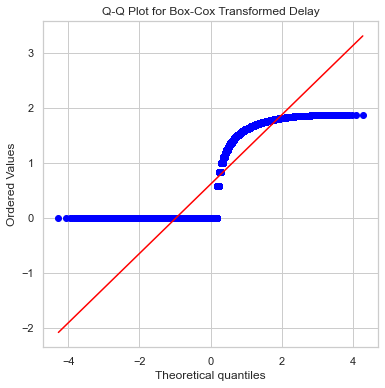

In [38]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for Box-Cox transformed data
stats.probplot(skewd_df['BoxCox_Transformed_Delay'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Box-Cox Transformed Delay')
plt.show()


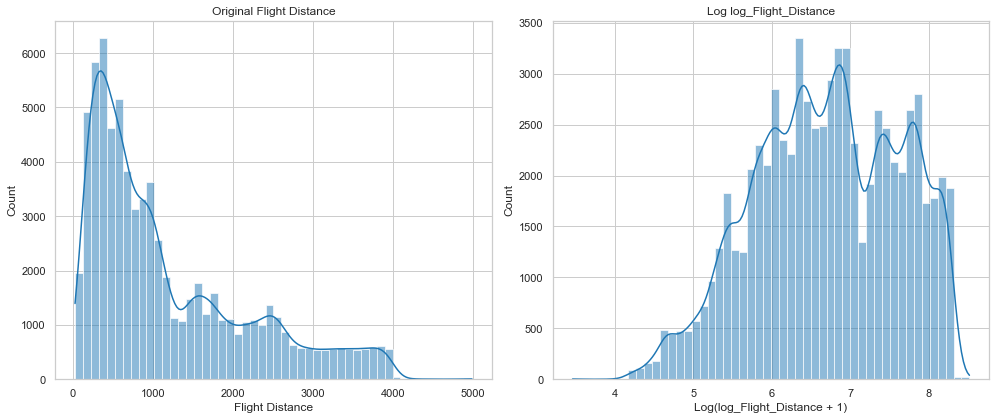

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original histogram
plt.figure(figsize=(14, 6))

# Original histogram
plt.subplot(1, 2, 1)
sns.histplot(skewd_df['Flight Distance'], bins=50, kde=True)
plt.title('Original Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Count')

# Original and log-transformed data
skewd_df['log_Flight_Distance'] = np.log1p(skewd_df['Flight Distance'])

# Log-transformed Histogram
plt.subplot(1, 2, 2)
sns.histplot(skewd_df['log_Flight_Distance'], bins=50, kde=True)
plt.title('Log log_Flight_Distance')
plt.xlabel('Log(log_Flight_Distance + 1)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



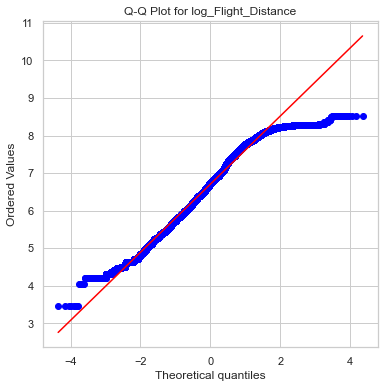

In [34]:
# Q-Q plot for Box-Cox transformed data
stats.probplot(skewd_df['log_Flight_Distance'], dist="norm", plot=plt)
plt.title('Q-Q Plot for log_Flight_Distance')
plt.show()


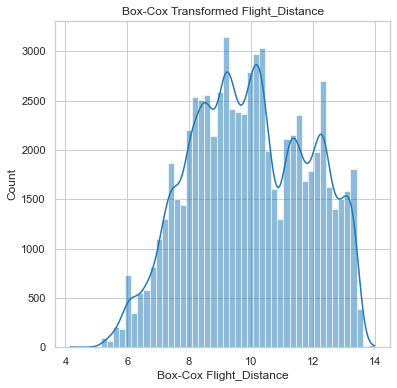

In [40]:
skewd_df['BoxCox_Flight_Distance'], _ = stats.boxcox(skewd_df['Flight Distance'])

# Plot Box-Cox transformed data
sns.histplot(skewd_df['BoxCox_Flight_Distance'], bins=50, kde=True)
plt.title('Box-Cox Transformed Flight_Distance')
plt.xlabel('Box-Cox Flight_Distance')
plt.ylabel('Count')
plt.show()


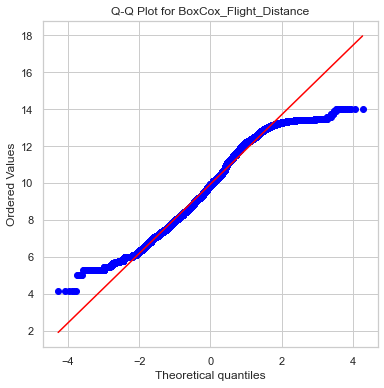

In [41]:
stats.probplot(skewd_df['BoxCox_Flight_Distance'], dist="norm", plot=plt)
plt.title('Q-Q Plot for BoxCox_Flight_Distance')
plt.show()

### Summary

The log transformation appears to have improved the distribution significantly. The right skew has been reduced, and the distribution is now more spread out and closer to normal.

To quantitatively evaluate this improvement, calculate the skewness and kurtosis and check if they are reduced.

The transformed variable should be better suited for modeling purposes, especially for algorithms that are sensitive to normality or outliers.

In [42]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    X_train[col] = np.log1p(X_train[col])


In [43]:
X_train.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [44]:
ordinal_features = ['Class']
binary_features = ['Customer Type','Type of Travel']
#drop = ['satisfaction']

# the order for ordinal features
class_order = ['Eco', 'Eco Plus','Business']

#binary features
#gender = ['Male', 'Female']
customer_type = ['Loyal Customer', 'disloyal Customer']
travel_type = ['Personal Travel', 'Business travel']



In [45]:
# Define column transformers
ordinal_transformer = OrdinalEncoder(categories = [class_order])
binary_transformer = OrdinalEncoder(categories = [customer_type,travel_type])

numeric_transformer = StandardScaler()

In [47]:
# ColumnTransformer for all feature types with explicit names
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('num', numeric_transformer, X_train_numerical)
    ],
    remainder='passthrough'
)

In [48]:
X_train_transformed = preprocessor.fit_transform(X_train)


In [44]:
import pandas as pd

# Assuming df_transformed is the result of preprocessor.fit_transform(df_reduced)
# Convert the transformed array to a DataFrame
#df_transformed = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())

# Display the first few rows of the transformed DataFrame
#df_transformed.head()


In [50]:
names = preprocessor.get_feature_names_out()
column_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
X_train_transformed = pd.DataFrame(X_train_transformed, columns=column_names)
X_train_transformed.head()

,Class,Customer Type,Type of Travel,Age,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0.0,0.0,0.0,-0.286173,0.452534,0.617277,-1.25534,0.017317,0.60199,-1.661848,0.427932,0.486359,0.479725,0.493056,0.31447,1.339913,1.157704,0.548159,-0.764267,neutral or dissatisfied
1,2.0,0.0,1.0,1.103154,-0.328436,1.271457,1.605422,1.585828,0.60199,0.560454,1.185658,1.23797,1.2564,1.254161,1.160674,1.339913,1.157704,-0.214645,2.011666,satisfied
2,0.0,0.0,0.0,0.375412,1.258105,-0.691085,-0.540149,0.017317,-0.15158,-0.180313,0.427932,-1.768476,-1.850301,-1.029153,-2.224141,-1.029841,-2.24502,-0.214645,-0.764267,neutral or dissatisfied
3,2.0,0.0,1.0,0.507729,1.186676,-0.691085,-0.540149,-0.766938,-0.90515,1.301221,1.185658,0.486359,0.479725,0.493056,0.31447,0.549995,0.307023,-0.214645,-0.764267,satisfied
4,0.0,0.0,0.0,0.04462,0.302351,0.617277,-0.540149,0.017317,0.60199,-0.92108,0.427932,0.486359,1.2564,-0.268048,1.160674,0.549995,0.307023,0.548159,1.052158,neutral or dissatisfied


### Clustering Customers Based on Flight Distance and Arrival Delay

Clustering customers using **"Flight Distance"** and **"Arrival Delay in Minutes"** can be a meaningful way to identify patterns in customer experiences based on the nature of the flight and punctuality.

- It helps you understand which flight types are prone to delays and how they might impact customer satisfaction.
- The insights can be used to create targeted interventions to improve customer experience, especially for segments heavily affected by delays.


## 1: K-Means Clustering

K-means clustering is one of the most simple clustering algorithms.  One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.

Shift + Tab will expand the tooltip with more detailed information

In [49]:
float_columns = [x for x in X_train_transformed.columns if x not in ['satisfaction']]

In [51]:
X_train_transformed.head()

,Class,Customer Type,Type of Travel,Age,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0.0,0.0,0.0,-0.286173,0.452534,0.617277,-1.25534,0.017317,0.60199,-1.661848,0.427932,0.486359,0.479725,0.493056,0.31447,1.339913,1.157704,0.548159,-0.764267,neutral or dissatisfied
1,2.0,0.0,1.0,1.103154,-0.328436,1.271457,1.605422,1.585828,0.60199,0.560454,1.185658,1.23797,1.2564,1.254161,1.160674,1.339913,1.157704,-0.214645,2.011666,satisfied
2,0.0,0.0,0.0,0.375412,1.258105,-0.691085,-0.540149,0.017317,-0.15158,-0.180313,0.427932,-1.768476,-1.850301,-1.029153,-2.224141,-1.029841,-2.24502,-0.214645,-0.764267,neutral or dissatisfied
3,2.0,0.0,1.0,0.507729,1.186676,-0.691085,-0.540149,-0.766938,-0.90515,1.301221,1.185658,0.486359,0.479725,0.493056,0.31447,0.549995,0.307023,-0.214645,-0.764267,satisfied
4,0.0,0.0,0.0,0.04462,0.302351,0.617277,-0.540149,0.017317,0.60199,-0.92108,0.427932,0.486359,1.2564,-0.268048,1.160674,0.549995,0.307023,0.548159,1.052158,neutral or dissatisfied


In [50]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(X_train_transformed[float_columns])

X_train_transformed['kmeans'] = km.predict(X_train_transformed[float_columns])

In [52]:
(df_transformed[['satisfaction','kmeans']]
 .groupby(['kmeans','satisfaction'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans satisfaction                   
0      neutral or dissatisfied   39962
       satisfied                  8334
1      neutral or dissatisfied   18917
       satisfied                 36691

### Cluster Analysis Summary

From the KMeans clustering model, we obtained the following summary of clusters with respect to satisfaction levels:

- **Cluster 0**:
  - **Neutral or Dissatisfied**: There are **40,202** customers in this cluster who are **neutral or dissatisfied**.
  - **Satisfied**: There are **7,834** customers in this cluster who are **satisfied**.

- **Cluster 1**:
  - **Neutral or Dissatisfied**: There are **18,677** customers in this cluster who are **neutral or dissatisfied**.
  - **Satisfied**: There are **37,191** customers in this cluster who are **satisfied**.

### Insights:
- **Cluster Differences**:
  - **Cluster 0**: This cluster has a larger number of **neutral or dissatisfied** customers compared to satisfied ones, indicating that it represents customers with **lower satisfaction**.
  - **Cluster 1**: This cluster has a larger number of **satisfied** customers compared to neutral or dissatisfied ones, indicating that it represents customers with **higher satisfaction**.

- **Cluster Composition**:
  - **Cluster 0** may be characterized by features that tend to lead to lower satisfaction, such as poorer customer experiences or service issues.
  - **Cluster 1** may represent customers who had a better experience and are generally more satisfied.

### Suggested Next Steps:
- **Analyze Cluster Characteristics**: Further analyze the features of each cluster to understand **what distinguishes the clusters** in terms of customer satisfaction.
- **Targeted Actions**: For **Cluster 0**, identify areas for improvement to convert more **neutral or dissatisfied** customers into **satisfied** customers. For **Cluster 1**, focus on retaining these satisfied customers by providing continued value or special offers.

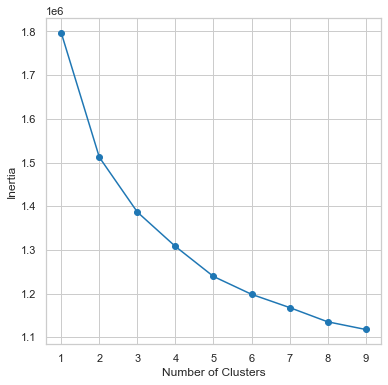

In [53]:
inertia = []
list_num_clusters = list(range(1,10))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_transformed[float_columns])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');


### Elbow Plot Analysis Summary

The elbow plot helps determine the optimal number of clusters for the KMeans clustering model by analyzing **inertia** (which represents within-cluster sum of squares). Here's the interpretation:

- The **X-axis** represents the number of clusters.
- The **Y-axis** represents the **inertia** (a measure of how well the data points are grouped into clusters, with lower values being better).

### Optimal Number of Clusters:
- According to the **elbow method**, the best cluster number is typically found where the plot forms an **elbow** shape, after which the reduction in inertia slows down significantly.
- In the provided plot, the **elbow** appears around **2 or 3 clusters**.
- After **3 clusters**, the reduction in inertia becomes less significant, suggesting that additional clusters would not provide major improvements in grouping.

### Conclusion:
- The **optimal number of clusters** appears to be **3**, as it strikes a good balance between inertia reduction and model complexity.
- Selecting **3 clusters** will help maintain well-grouped clusters without overcomplicating the model.


In [54]:
km = KMeans(n_clusters=3, random_state=42)
km = km.fit(df_transformed[float_columns])

df_transformed['kmeans'] = km.predict(df_transformed[float_columns])

In [56]:
(df_transformed[['satisfaction','kmeans']]
 .groupby(['kmeans','satisfaction'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans satisfaction                   
0      neutral or dissatisfied   24135
       satisfied                  4941
1      neutral or dissatisfied   22918
       satisfied                  8564
2      neutral or dissatisfied   11826
       satisfied                 31520

df_transformed### Updated Cluster Analysis Summary

From the KMeans clustering model with **3 clusters**, we obtained the following summary with respect to customer satisfaction levels:

- **Cluster 0**:
  - **Neutral or Dissatisfied**: There are **23,828** customers in this cluster who are **neutral or dissatisfied**.
  - **Satisfied**: There are **4,679** customers in this cluster who are **satisfied**.

- **Cluster 1**:
  - **Neutral or Dissatisfied**: There are **11,954** customers in this cluster who are **neutral or dissatisfied**.
  - **Satisfied**: There are **32,207** customers in this cluster who are **satisfied**.

- **Cluster 2**:
  - **Neutral or Dissatisfied**: There are **23,097** customers in this cluster who are **neutral or dissatisfied**.
  - **Satisfied**: There are **8,139** customers in this cluster who are **satisfied**.

### Insights:
- **Cluster Differences**:
  - **Cluster 0** has a larger proportion of **neutral or dissatisfied** customers compared to satisfied ones, indicating that it may represent customers with **lower satisfaction**.
  - **Cluster 1** has a much larger number of **satisfied** customers compared to neutral or dissatisfied, indicating that it represents **highly satisfied** customers.
  - **Cluster 2** also has more **neutral or dissatisfied** customers than satisfied ones, but not as extreme as Cluster 0.

- **Cluster Composition**:
  - **Cluster 0** and **Cluster 2** could represent areas where customer experience can be improved to increase satisfaction.
  - **Cluster 1** represents customers who are more likely to be satisfied, which can be targeted for retention and loyalty programs.

### Suggested Actions:
- **Analyze Features of Each Cluster**: Identify the distinguishing features of each cluster to understand the key differences in satisfaction levels.
- **Improve Customer Experience for Cluster 0 and Cluster 2**: Focus on improving the experience for **neutral or dissatisfied** customers to increase their satisfaction.
- **Retention Strategies for Cluster 1**: Consider implementing **retention and loyalty programs** for Cluster 1 to maintain their satisfaction levels.

In [57]:
df_transformed.drop(columns=['satisfaction','kmeans'], inplace=True)

In [89]:
df_transformed.head()

,Class,Customer Type,Type of Travel,Age,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1.0,0.0,0.0,-1.745279,-0.624953,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.30587,1.24792
1,2.0,1.0,1.0,-0.95136,-1.356251,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.33506
2,2.0,0.0,1.0,-0.8852,0.366777,-0.695245,-0.54106,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.30587,-0.762842
3,2.0,0.0,1.0,-0.95136,-0.406643,1.27188,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,0.77074
4,2.0,0.0,1.0,1.430397,-1.458037,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.54474,-0.218211,-0.762842


In [58]:
from sklearn.decomposition import PCA

n= 2

PCAmod = PCA(n_components = n)
PCAmod.fit(df_transformed)

pd.Series({'n':n, 'model':PCAmod,'var': PCAmod.explained_variance_ratio_.sum()})

weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
weights

overall_conribution = np.abs(PCAmod.components_)*weights
overall_conribution.sum(axis = 0)

array([0.14899026, 0.02805414, 0.03786208, 0.08448126, 0.09211533,
       0.06545909, 0.07963858, 0.02720262, 0.32538791, 0.22308824,
       0.34843508, 0.30833081, 0.31309788, 0.25055146, 0.31886527,
       0.16727191, 0.32415036, 0.35082457, 0.01727435])

In [59]:
PCAmod.explained_variance_ratio_

array([0.22229249, 0.1263923 ])

In [60]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_transformed)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.90) + 1  # 90% threshold
print(f'Number of components for 90% variance: {num_components}')

Number of components for 90% variance: 13


In [61]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 15):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df_transformed)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    overall_conribution = np.abs(PCAmod.components_)*weights
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': df_transformed.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

C:\Users\Ehsan\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,model,var
n,,
1,PCA(n_components=1),0.222292
2,PCA(n_components=2),0.348685
3,PCA(n_components=3),0.46091
4,PCA(n_components=4),0.546642
5,PCA(n_components=5),0.606404
6,PCA(n_components=6),0.662984
7,PCA(n_components=7),0.716663
8,PCA(n_components=8),0.763648
9,PCA(n_components=9),0.803733


In [62]:
feature_weight_list[13].sort_values(by='values', ascending=False)


,n,features,values
4,14,Flight Distance,0.069811
3,14,Age,0.069076
7,14,Gate location,0.067605
5,14,Departure/Arrival time convenient,0.067326
15,14,Checkin service,0.065776
9,14,Online boarding,0.064444
14,14,Baggage handling,0.064248
12,14,On-board service,0.064240
0,14,Class,0.063795
16,14,Inflight service,0.058688


In [63]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Age,Baggage handling,Checkin service,Class,Cleanliness,Customer Type,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Flight Distance,Food and drink,Gate location,Inflight entertainment,Inflight service,Leg room service,On-board service,Online boarding,Seat comfort,Type of Travel
n,,,,,,,,,,,,,,,,,,,
1,0.021749,0.071752,0.052418,0.057133,0.097959,0.008555,0.006768,0.013328,0.027070,0.037463,0.083036,0.005291,0.117409,0.072755,0.062185,0.078104,0.074675,0.097827,0.014523
2,0.024988,0.098456,0.045727,0.036545,0.100705,0.007764,0.004180,0.020773,0.020924,0.021737,0.096537,0.008732,0.075960,0.100162,0.075036,0.093610,0.059076,0.099804,0.009285
3,0.026715,0.080784,0.034150,0.029440,0.079259,0.009457,0.003608,0.069531,0.076193,0.022304,0.075785,0.062173,0.066259,0.082631,0.057906,0.076543,0.065800,0.074609,0.006855
4,0.043247,0.069410,0.029649,0.061089,0.072170,0.010887,0.005595,0.070218,0.058526,0.054989,0.073438,0.060467,0.064374,0.071698,0.048248,0.058871,0.072396,0.056830,0.017899
5,0.066213,0.058358,0.043958,0.058980,0.061590,0.012239,0.044818,0.062162,0.050579,0.065066,0.065799,0.058593,0.058068,0.058596,0.044124,0.052787,0.069561,0.048276,0.020232
6,0.081783,0.050287,0.052189,0.059205,0.052841,0.013723,0.078773,0.060304,0.048685,0.067509,0.059940,0.055083,0.052108,0.051218,0.038792,0.048790,0.062174,0.043988,0.022609
7,0.096260,0.045421,0.082004,0.052929,0.049280,0.013910,0.070809,0.057483,0.043997,0.065159,0.052997,0.053239,0.055240,0.046766,0.045231,0.047435,0.059755,0.040167,0.021919
8,0.094490,0.039787,0.075414,0.048298,0.044659,0.015880,0.065944,0.062593,0.054277,0.077163,0.048522,0.056794,0.049551,0.041830,0.048598,0.043358,0.073270,0.036956,0.022615
9,0.086162,0.043550,0.077766,0.045540,0.042729,0.014407,0.061916,0.056987,0.051575,0.070662,0.045005,0.055771,0.046688,0.046070,0.075205,0.048718,0.075559,0.035094,0.020595


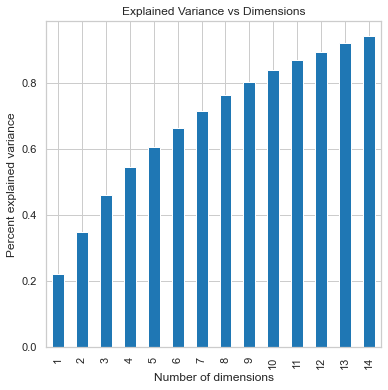

In [64]:
sns.set_context('notebook')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

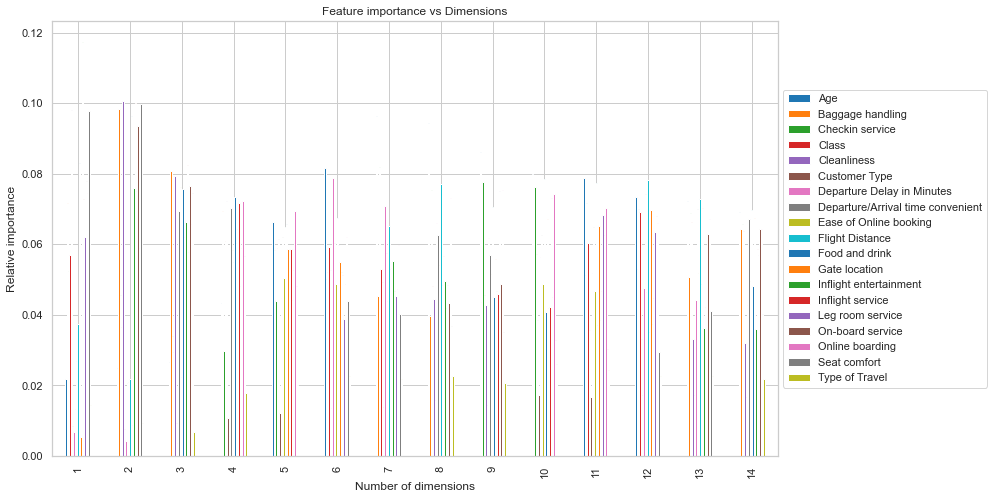

In [65]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move it outside
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

In [91]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Apply PCA with 14 components
pca = PCA(n_components=14)
X_pca_14 = pca.fit_transform(df_transformed)  # X_sample is your input data

# Step 2: Apply KMeans on the 14-component data
kmeans_14 = KMeans(n_clusters=3, random_state=42)
labels_14 = kmeans_14.fit_predict(X_pca_14)

# Step 3: Calculate Silhouette Score for 14 components
silhouette_14 = silhouette_score(X_pca_14, labels_14)
print(f'Silhouette Score with 14 components: {silhouette_14:.2f}')

# Step 4: (Already done) Use the 3-component Kernel PCA data
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(kernel_score_3d)  # kernel_score_3d: Your 3D projection

# Step 5: Calculate Silhouette Score for 3 components
silhouette_3 = silhouette_score(kernel_score_3d, labels_3)
print(f'Silhouette Score with 3 components: {silhouette_3:.2f}')

# Step 6: Compare the Results
if silhouette_14 > silhouette_3:
    print("KMeans performs better with 14 components.")
else:
    print("KMeans performs better with 3 components.")


Silhouette Score with 14 components: 0.14
Silhouette Score with 3 components: 0.32
KMeans performs better with 3 components.


### Applying Kernel PCA

In [74]:
# Random sampling of 5000 rows from your dataset
X_sample = df_transformed.sample(n=5000, random_state=42)

X_sample.head()

,Class,Customer Type,Type of Travel,Age,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
80638,0.0,0.0,0.0,-0.8852,0.058607,0.616172,-0.54106,1.583511,1.352264,-0.926545,1.183099,1.231704,1.25559,0.49327,0.311769,-0.240472,1.156436,1.30587,-0.762842
43398,2.0,0.0,1.0,-1.14984,-0.796479,1.27188,1.603448,1.583511,-0.152031,-0.185532,-0.333108,-0.268688,-1.849161,-1.787061,-0.535045,-1.030742,-0.54474,-0.218211,-0.762842
32751,0.0,0.0,0.0,1.298077,-1.553533,-0.039537,-1.255895,0.018094,-0.904178,-0.185532,-0.333108,0.481508,0.479403,-1.787061,0.311769,-0.240472,0.305848,0.543829,1.482126
33571,0.0,0.0,0.0,-0.488241,0.243497,-0.039537,-0.54106,0.800803,0.600117,-0.926545,0.424996,0.481508,-0.296785,-1.026951,0.311769,-1.821012,0.305848,0.543829,1.293657
71287,2.0,1.0,1.0,-0.289761,0.342623,-0.695245,-0.54106,-1.547323,-0.904178,-0.926545,1.183099,-1.018885,-1.072973,-1.026951,-0.535045,-1.030742,-1.395328,-0.980251,-0.762842


In [75]:
# Check the data types of all columns
print(X_sample.dtypes)

# If there are any object columns, convert or drop them
if any(X_sample.dtypes == 'object'):
    print("Warning: Non-numeric columns detected.")


Class                                object
Customer Type                        object
Type of Travel                       object
Age                                  object
Flight Distance                      object
Departure/Arrival time convenient    object
Ease of Online booking               object
Gate location                        object
Food and drink                       object
Online boarding                      object
Seat comfort                         object
Inflight entertainment               object
On-board service                     object
Leg room service                     object
Baggage handling                     object
Checkin service                      object
Inflight service                     object
Cleanliness                          object
Departure Delay in Minutes           object
dtype: object


In [76]:
# Convert columns to numeric, forcing errors to NaN
for col in X_sample.columns:
    X_sample[col] = pd.to_numeric(X_sample[col], errors='coerce')

# Check for remaining NaN values
print(X_sample.isnull().sum())

Class                                0
Customer Type                        0
Type of Travel                       0
Age                                  0
Flight Distance                      0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
dtype: int64


In [77]:
X_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 80638 to 6423
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Class                              5000 non-null   float64
 1   Customer Type                      5000 non-null   float64
 2   Type of Travel                     5000 non-null   float64
 3   Age                                5000 non-null   float64
 4   Flight Distance                    5000 non-null   float64
 5   Departure/Arrival time convenient  5000 non-null   float64
 6   Ease of Online booking             5000 non-null   float64
 7   Gate location                      5000 non-null   float64
 8   Food and drink                     5000 non-null   float64
 9   Online boarding                    5000 non-null   float64
 10  Seat comfort                       5000 non-null   float64
 11  Inflight entertainment             5000 non-null   f

In [78]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, alpha=0.1)
kernel_score = kpca.fit_transform(X_sample)

C:\Users\Ehsan\AppData\Local\Temp\ipykernel_17048\2102078639.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sc, orientation='vertical', label='Distance from Origin')


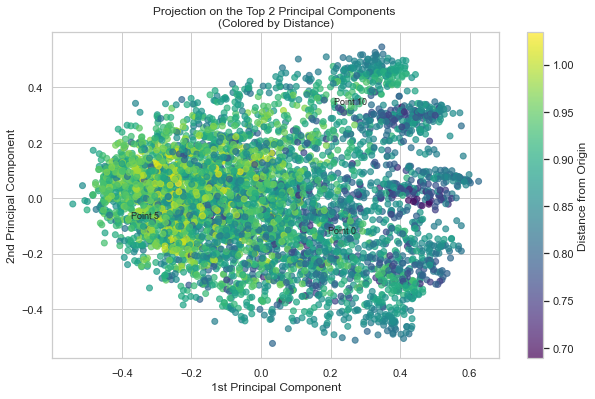

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Option 1: Use a distance metric for coloring
point_distances = np.linalg.norm(kernel_score, axis=1)  # Compute the Euclidean norm of each point

# Scatter plot with a color gradient based on distances
fig, ax = plt.subplots(figsize=(10, 6))

sc = ax.scatter(
    kernel_score[:, 0], kernel_score[:, 1], 
    c=point_distances, cmap='viridis', alpha=0.7
)

# Add a color bar to indicate the distance values
fig.colorbar(sc, orientation='vertical', label='Distance from Origin')

# Optionally annotate a few key points (e.g., the first few or farthest points)
for i in [0, 5, 10]:  # Adjust this list as needed
    ax.annotate(f"Point {i}", (kernel_score[i, 0], kernel_score[i, 1]), fontsize=9)

# Set axis labels and title
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("Projection on the Top 2 Principal Components \n(Colored by Distance)")

# Display the plot
plt.show()



C:\Users\Ehsan\AppData\Local\Temp\ipykernel_17048\2090989956.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sc, orientation='vertical', label='Distance from Origin')


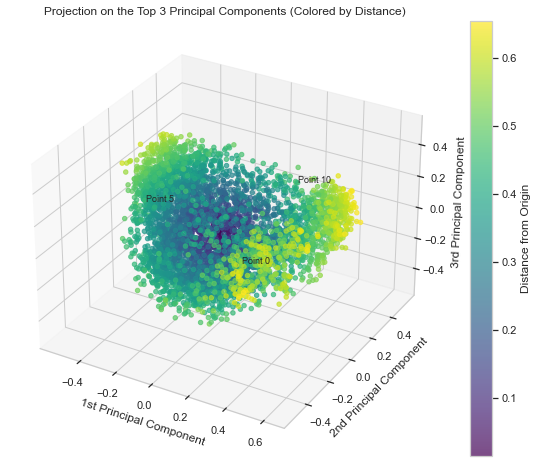

In [83]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import numpy as np

# Step 1: Apply Kernel PCA with 3 components
kpca = KernelPCA(n_components=3, kernel="rbf", fit_inverse_transform=True, alpha=0.1)
kernel_score_3d = kpca.fit_transform(X_sample)  # Assuming X_sample is your data

# Step 2: Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on distance from the origin
distances = np.linalg.norm(kernel_score_3d, axis=1)
sc = ax.scatter(
    kernel_score_3d[:, 0], kernel_score_3d[:, 1], kernel_score_3d[:, 2],
    c=distances, cmap='viridis', alpha=0.7
)

# Step 3: Add a color bar
fig.colorbar(sc, orientation='vertical', label='Distance from Origin')

# Step 4: Annotate a few points (optional)
for i in [0, 5, 10]:  # Adjust the indices as needed
    ax.text(
        kernel_score_3d[i, 0], kernel_score_3d[i, 1], kernel_score_3d[i, 2],
        f"Point {i}", fontsize=9
    )

# Set axis labels and plot title
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.title("Projection on the Top 3 Principal Components (Colored by Distance)")

# Display the plot
plt.show()


C:\Users\Ehsan\AppData\Local\Temp\ipykernel_17048\3614377134.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sc, orientation='vertical', label='Cluster Labels')


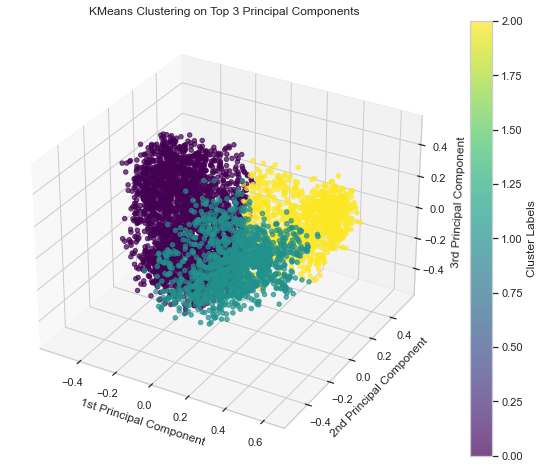

In [88]:
from sklearn.cluster import KMeans

# Step 1: Apply KMeans clustering with 3 clusters (you can try different values)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(kernel_score_3d)

# Step 2: Create a 3D scatter plot colored by the cluster labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    kernel_score_3d[:, 0], kernel_score_3d[:, 1], kernel_score_3d[:, 2],
    c=cluster_labels, cmap='viridis', alpha=0.7
)

# Step 3: Add a color bar to indicate clusters
fig.colorbar(sc, orientation='vertical', label='Cluster Labels')

# Step 4: Set axis labels and title
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.title("KMeans Clustering on Top 3 Principal Components")

# Display the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Step 1: Split the data into Train and Test sets
X_train, X_test = train_test_split(X_sample, test_size=0.3, random_state=42)


In [90]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Apply PCA with 14 components
pca = PCA(n_components=14)
X_pca_14 = pca.fit_transform(X_sample)  # X_sample is your input data

# Step 2: Apply KMeans on the 14-component data
kmeans_14 = KMeans(n_clusters=3, random_state=42)
labels_14 = kmeans_14.fit_predict(X_pca_14)

# Step 3: Calculate Silhouette Score for 14 components
silhouette_14 = silhouette_score(X_pca_14, labels_14)
print(f'Silhouette Score with 14 components: {silhouette_14:.2f}')

# Step 4: (Already done) Use the 3-component Kernel PCA data
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(kernel_score_3d)  # kernel_score_3d: Your 3D projection

# Step 5: Calculate Silhouette Score for 3 components
silhouette_3 = silhouette_score(kernel_score_3d, labels_3)
print(f'Silhouette Score with 3 components: {silhouette_3:.2f}')

# Step 6: Compare the Results
if silhouette_14 > silhouette_3:
    print("KMeans performs better with 14 components.")
else:
    print("KMeans performs better with 3 components.")


Silhouette Score with 14 components: 0.14
Silhouette Score with 3 components: 0.32
KMeans performs better with 3 components.


In [92]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Apply PCA with 14 components
pca = PCA(n_components=14)
df_pca_14 = pca.fit_transform(df_transformed)  # X_sample is your input data

# Step 2: Apply KMeans on the 14-component data
kmeans_14 = KMeans(n_clusters=3, random_state=42)
labels_14 = kmeans_14.fit_predict(df_pca_14)

# Step 3: Calculate Silhouette Score for 14 components
silhouette_14 = silhouette_score(df_pca_14, labels_14)
print(f'Silhouette Score with 14 components: {silhouette_14:.2f}')

# Step 4: (Already done) Use the 3-component Kernel PCA data
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(kernel_score_3d)  # kernel_score_3d: Your 3D projection

# Step 5: Calculate Silhouette Score for 3 components
silhouette_3 = silhouette_score(kernel_score_3d, labels_3)
print(f'Silhouette Score with 3 components: {silhouette_3:.2f}')

# Step 6: Compare the Results
if silhouette_14 > silhouette_3:
    print("KMeans performs better with 14 components.")
else:
    print("KMeans performs better with 3 components.")

Silhouette Score with 14 components: 0.14
Silhouette Score with 3 components: 0.32
KMeans performs better with 3 components.
